# Question 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
def polynomial_model(beta, x):
    '''
    A polynomial model.
    beta: numpy array of parameters of size (m,)
    x: numpy array of size (n,)
    return yhat: prediction of the model of size (n,)
    '''
    # Turn x (n,) to X (n, m) where m is the order of the polynomial
    # The second axis is the value of x**m
    X = x[:, np.newaxis] ** np.arange(0, len(beta))
    # Perform model prediction
    yhat = np.sum(beta * X, axis=1)
    return yhat
# Construct a dataset
x = np.arange(-2, 3)
beta_actual = [1, 2, 1]
y = polynomial_model(beta_actual, x) + np.random.normal(size=x.size, scale=1)

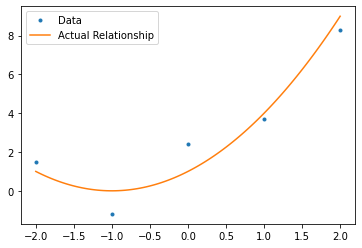

In [9]:
# Plot results
fig, ax = plt.subplots()
ax.plot(x, y, '.')
xplt = np.linspace(min(x), max(x), 100)
yplt = polynomial_model(beta_actual, xplt)
plt.plot(xplt, yplt, '-')
ax.legend(['Data', 'Actual Relationship'])
plt.show()

In [10]:
def cost(beta, **kwargs):
    """
    Calculates the quadratic cost, with an optional regularization
    :param beta: Model Parameters
    :param kwargs:
    :return:
    """
    x = kwargs['x']
    y = kwargs['y']
    model = kwargs['model']
    # Calculate predicted y given parameters
    yhat = model(beta, x)
    # Calculate the cost
    C = sum((y-yhat)**2) / len(y)
    return C

In [28]:
class GradDescent:
    def __init__(self, model, C, beta0, x, y, dbeta=1E-8, eta=0.0001, ftol=1E-8):
        self.model = model
        self.C = C
        self.beta = beta0
        self.x = x
        self.y = y
        self.dbeta = dbeta
        self.eta = eta
        self.ftol = ftol
    def descend(self):
        # This dict of cost parameters does not change between calls
        cost_inputs = {'x': self.x,
                       'y': self.y,
                       'model': self.model
                       }
        costs = [self.C(self.beta, **cost_inputs)]
        run_condition = True
        while run_condition:
            # Get the gradient of the cost
            delC = []
            for n, beta_n in enumerate(self.beta):
                # Create a temporary parameters vector, to change the nth parameter
                temp_beta = self.beta
                temp_beta[n] = beta_n + self.dbeta  # Adjusts the nth parameter by dbeta
                C_n = self.C(temp_beta, **cost_inputs)
                dC = C_n - costs[-1]
                delC.append(dC / self.dbeta)
            # Update the parameters
            self.beta = self.beta - self.eta * np.array(delC)
            # Re calc C
            costs.append(self.C(self.beta, **cost_inputs))
            # Evaluate running condition
            run_condition = abs(costs[-1] - costs[-2]) > self.ftol

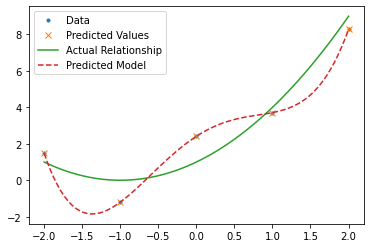

In [29]:
# Initialize parameters, use a polynomial of order 5
beta0 = np.random.normal(size=(5,), scale=1)
# Initialize a GradDescent object, perform descent and get parameters
gd = GradDescent(polynomial_model, cost, beta0, x, y)
gd.descend()
beta = gd.beta
# Make model prediction with parameters
yhat = polynomial_model(beta, x)
# Plot results
fig, ax = plt.subplots()
ax.plot(x, y, '.')
ax.plot(x, yhat, 'x')
xplt = np.linspace(min(x), max(x), 100)
yplt = polynomial_model(beta_actual, xplt)
plt.plot(xplt, yplt, '-')
yplt = polynomial_model(beta, xplt)
plt.plot(xplt, yplt, '--')
ax.legend(['Data', 'Predicted Values', 'Actual Relationship', 'Predicted Model'])
plt.show()

In [30]:
class GradDescent:
    def __init__(self, model, C, beta0, x, y, reg=None, lmda=0, dbeta=1E-8, eta=0.0001, ftol=1E-8):
        self.model = model
        self.C = C
        self.beta = beta0
        self.x = x
        self.y = y
        self.reg = reg
        self.lmda = lmda
        self.dbeta = dbeta
        self.eta = eta
        self.ftol = ftol
    def descend(self):
        # This dict of cost parameters does not change between calls
        cost_inputs = {'x': self.x,
                       'y': self.y,
                       'reg': self.reg,
                       'lmda': self.lmda,
                       'model': self.model
                       }
        # Initialize a list of costs, with the indices being the iteration
        costs = [self.C(self.beta, **cost_inputs)]
        run_condition = True
        while run_condition:
            # Get the gradient of the cost
            delC = []
            for n, beta_n in enumerate(self.beta):
                # Create a temporary parameters vector, to change the nth parameter
                temp_beta = self.beta
                temp_beta[n] = beta_n + self.dbeta  # Adjusts the nth parameter by dbeta
                C_n = self.C(temp_beta, **cost_inputs)
                dC = C_n - costs[-1]
                delC.append(dC / self.dbeta)
            # Update the parameters
            self.beta = self.beta - self.eta * np.array(delC)
            # Re calc C
            costs.append(self.C(self.beta, **cost_inputs))
            # Evaluate running condition
            run_condition = abs(costs[-1] - costs[-2]) > self.ftol
def cost(beta, **kwargs):
    """
    Calculates the quadratic cost, with an optional regularization
    :param beta: Model Parameters
    :param kwargs:
    :return:
    """
    x = kwargs['x']
    y = kwargs['y']
    reg = kwargs['reg']
    lmda = kwargs['lmda']
    model = kwargs['model']
    # Calculate predicted y given parameters
    yhat = model(beta, x)
    # Calculate the cost
    C = sum((y-yhat)**2) / len(y)
    if reg is not None:
        if reg == 'L1':  # For Lasso Regression (L1), add the magnitudes
            C += lmda * sum(abs(beta))
        elif reg == 'L2':  # For Ridge Regression (L2), add the squared magnitude
            C += lmda * sum(beta**2)
    return C

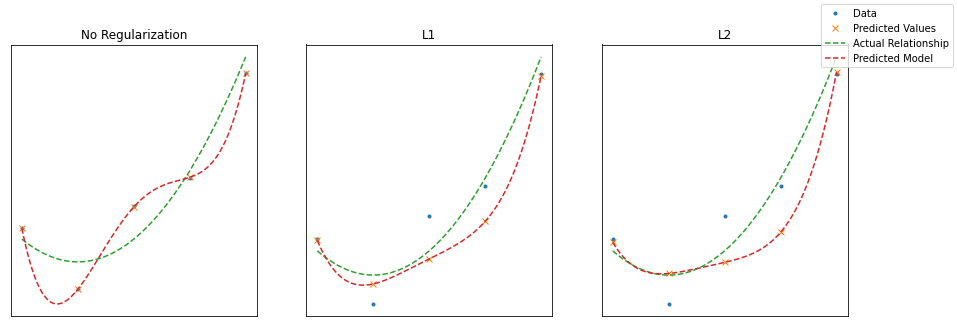

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (reg, lmda) in enumerate(zip([None, 'L1', 'L2'], [0, 1, 1])):
    # Initialize a GradDescent object, perform descent and get parameters
    gd = GradDescent(polynomial_model, cost, beta0, x, y, reg=reg, lmda=lmda)
    gd.descend()
    beta = gd.beta
    # Make model prediction with parameters
    yhat = polynomial_model(beta, x)
    axs[i].plot(x, y, '.')
    axs[i].plot(x, yhat, 'x')
    xplt = np.linspace(min(x), max(x), 100)
    yplt = polynomial_model(beta_actual, xplt)
    axs[i].plot(xplt, yplt, '--')
    yplt = polynomial_model(beta, xplt)
    axs[i].plot(xplt, yplt, '--')
    # Set title
    if reg is not None:
        axs[i].set_title(reg)
    else:
        axs[i].set_title("No Regularization")
    # Clean up the plots - remove x,y ticks and labels
    axs[i].axes.xaxis.set_ticklabels([])
    axs[i].axes.yaxis.set_ticklabels([])
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
fig.legend(['Data', 'Predicted Values', 'Actual Relationship', 'Predicted Model'])
plt.show()

# Question 2

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [36]:
df_ = pd.read_csv("Hitters.csv")

In [37]:
df = df_.copy()

In [38]:
def data_review(dataframe):
    print("**********head**********")
    print(dataframe.head())
    print("**********isna**********")
    print(dataframe.isnull().sum())
    print("**********shape*********")
    print(dataframe.shape)
    print("*********info***********")
    print(dataframe.info())
    print("*********describe*******")
    print(dataframe.describe().T)
    print("*********nuniq*******")
    print(dataframe.nunique())

In [39]:
data_review(df)

**********head**********
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
**********isna**********
A

In [40]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [41]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [42]:
cat_cols

['League', 'Division', 'NewLeague']

In [43]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [44]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [45]:
df["Walks"].mean()

38.74223602484472

In [46]:
df["CHmRun"].mean()

69.49068322981367

In [47]:
df['Year_lab'] = pd.cut(x=df['Years'], bins=[0, 3, 6, 10, 15, 19, 24])
df.groupby(['League','Division', 'Year_lab']).agg({'Salary':'mean'})

Salary
League Division Year_lab            
A      E        (0, 3]    112.500000
                (3, 6]    655.568182
                (6, 10]   852.738125
                (10, 15]  816.311353
                (15, 19]  665.416750
                (19, 24]         NaN
       W        (0, 3]    153.613636
                (3, 6]    401.360000
                (6, 10]   633.958375
                (10, 15]  835.250000
                (15, 19]  479.000000
                (19, 24]  487.500000
N      E        (0, 3]    248.520813
                (3, 6]    501.191650
                (6, 10]   824.226143
                (10, 15]  894.322667
                (15, 19]  662.500000
                (19, 24]         NaN
       W        (0, 3]    191.766667
                (3, 6]    458.333333
                (6, 10]   563.229187
                (10, 15]  721.894000
                (15, 19]  760.833250
                (19, 24]  475.000000

In [48]:
df['Salary'] = df.groupby(['League', 'Division', 'Year_lab'])['Salary'].transform(lambda x: x.fillna(x.mean()))

In [49]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
Year_lab     0
dtype: int64

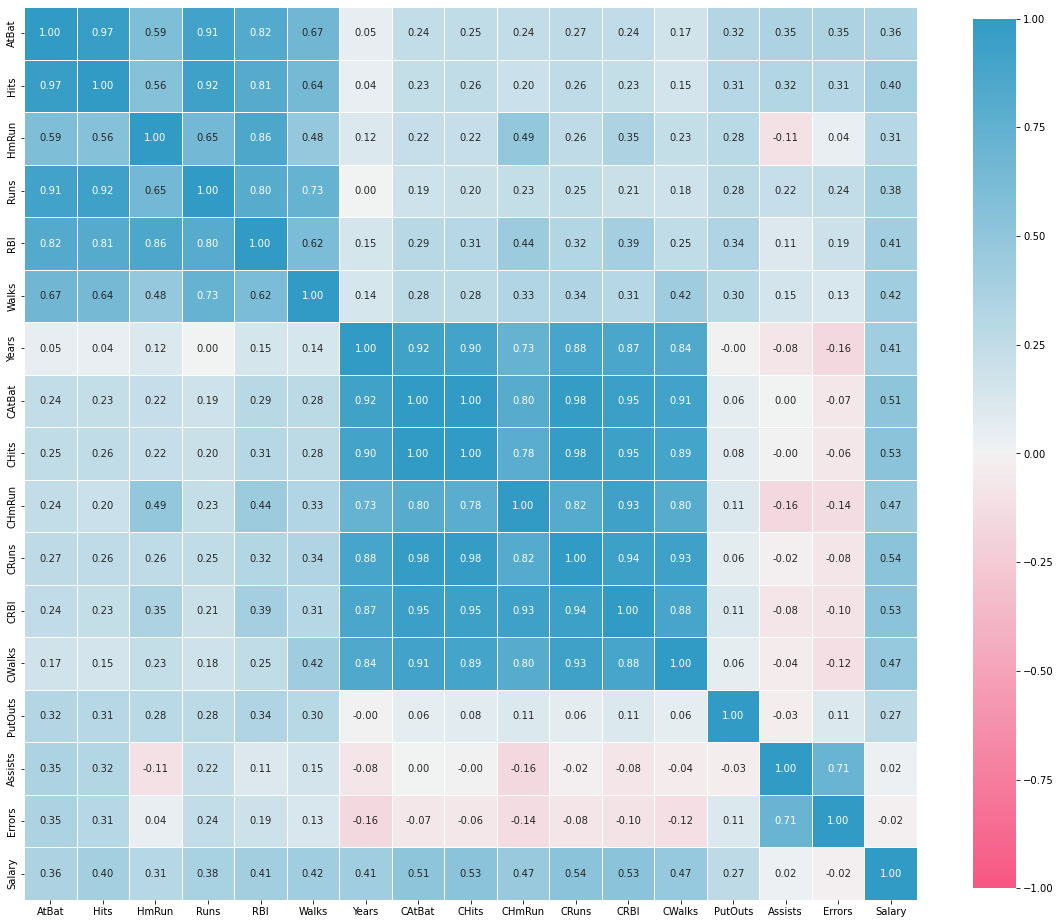

In [50]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, cbar_kws={'shrink': .8}, square=True, annot=True, fmt='.2f',
            linewidths=.8)
plt.show()

In [51]:
le = LabelEncoder()
df['League'] = le.fit_transform(df['League'])
df['Division'] = le.fit_transform(df['Division'])
df['NewLeague'] = le.fit_transform(df['NewLeague'])

In [52]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [53]:
df['Year_lab'] = le.fit_transform(df['Year_lab'])

In [54]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,112.5,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1,3
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1,0


In [55]:
data = df.drop(["Salary","League", "NewLeague","Division","Year_lab"], axis=1)

In [56]:
for col in data:
    df[col] = RobustScaler().fit_transform(df[[col]])

In [57]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,-0.336904,-0.410959,-0.583333,-0.464516,-0.408163,-0.677419,-0.714286,-0.526146,-0.519847,-0.480263,-0.509390,-0.567407,-0.575368,0,0,1.084589,-0.040881,1.750,112.5,0,0
1,-0.251217,-0.205479,-0.083333,-0.619355,-0.163265,0.129032,1.142857,0.489461,0.384593,0.414474,0.173709,0.573333,0.751838,1,1,1.946698,0.022013,0.500,475.0,1,3
2,0.387537,0.465753,0.833333,0.464516,0.761905,1.322581,-0.428571,-0.097828,-0.059982,0.335526,-0.053991,0.134815,0.340074,0,1,3.096176,0.267296,1.000,480.0,0,0
3,0.453749,0.616438,1.000000,0.438710,0.925170,0.064516,0.714286,1.190668,1.254925,2.467105,1.363850,1.829630,0.674632,1,0,-0.055620,-0.179245,-0.375,500.0,1,3
4,-0.227848,-0.123288,0.166667,-0.232258,-0.054422,-0.161290,-0.571429,-0.493001,-0.478683,-0.335526,-0.467136,-0.517037,-0.505515,1,0,2.748552,0.003145,-0.250,91.5,1,0


In [58]:
y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_linreg_rmse

308.8623753197253

In [59]:
y_pred = model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

294.70341272904807

In [60]:
linreg.intercept_

98.19143192808508

In [61]:
linreg.coef_

array([-6.05061944e+02,  4.90822537e+02,  3.67858226e+01, -5.72522169e+01,
       -6.32969806e-01,  1.99406385e+02, -4.76489290e+02, -6.05516479e+02,
        1.71616459e+02, -5.30844639e+01,  6.42713056e+02,  3.01635138e+02,
       -2.17673141e+02, -1.39802189e+01, -1.12548750e+02,  5.32339759e+01,
        7.15535845e+01, -1.86852544e+01, -2.93081795e+00,  2.69685321e+02])

In [62]:
df_linreg_rmse

308.8623753197253

In [63]:
np.mean(np.sqrt(-cross_val_score(model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

317.79775748014237

# Question 3

<AxesSubplot:>

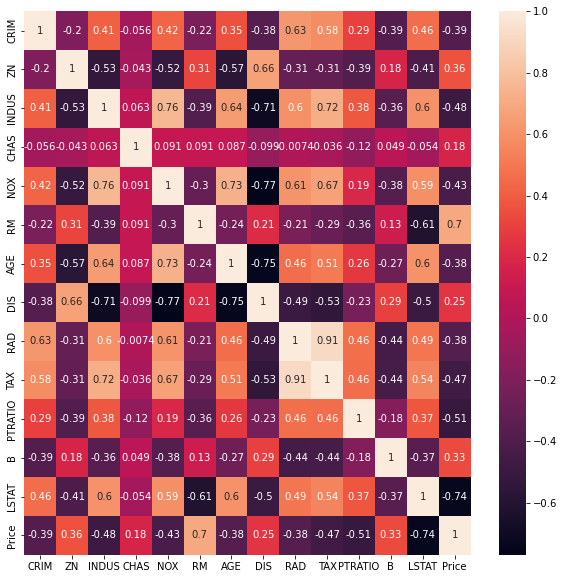

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston


boston = load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df['Price']=boston.target

boston_df.head()

plt.figure(figsize = (10, 10))
sns.heatmap(boston_df.corr(), annot = True)

In [65]:
features = boston_df.columns[0:11]
target = boston_df.columns[-1]
X = boston_df[features].values
y = boston_df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train,y_train)
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)
print("\nRidge Model.....\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.6451071762824847
The test score for lr model is 0.7250499219702485

Ridge Model.....

The train score for ridge model is 0.6434858395387215
The test score for ridge model is 0.7237918203738392


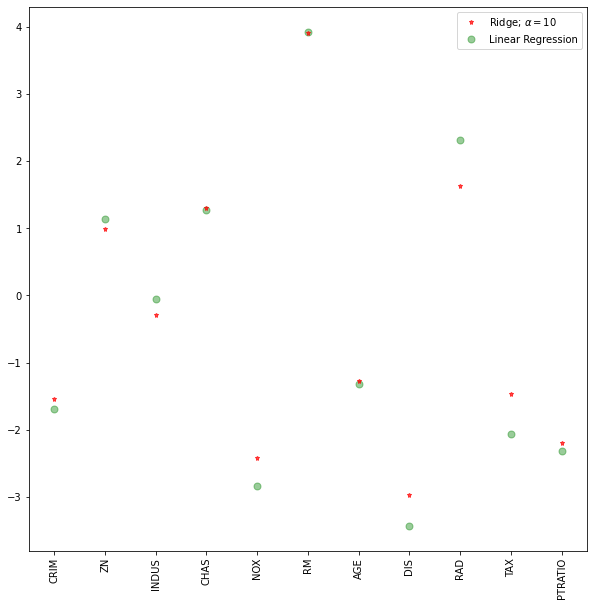

In [67]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [68]:
print("\nLasso Model...\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model...

The train score for ls model is 0.0
The test score for ls model is -0.0030704836212473996


<AxesSubplot:>

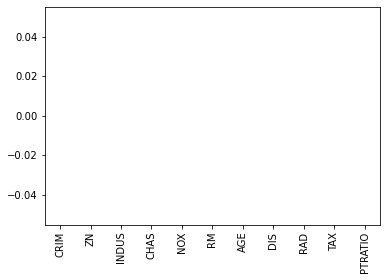

In [69]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")

In [70]:
#Using the linear CV model
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.6450549796979889
0.7255165557103279


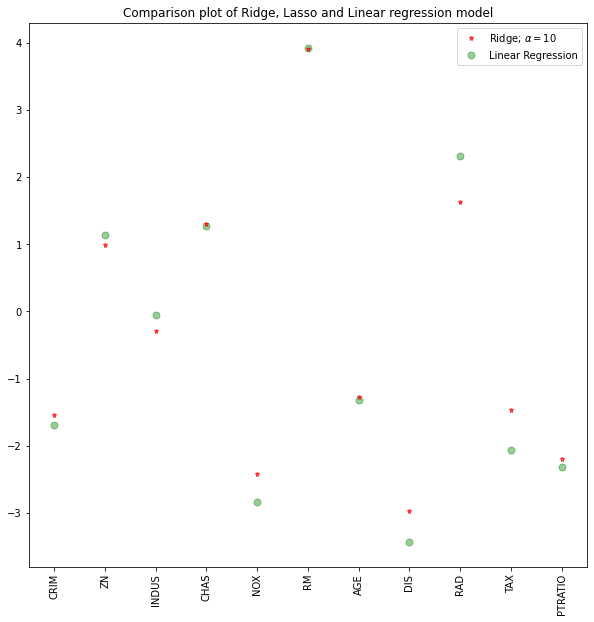

In [71]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#addd plot for lasso regression
#plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


In [72]:
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.6434858395387206
The train score for ridge model is 0.7237918203738403
